# group by机制

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'], 
                   'data1' : np.random.randn(5), 
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.305719,0.838157
1,a,two,1.072278,-0.982591
2,b,one,0.608808,0.223758
3,b,two,-0.489625,1.438290
4,a,one,-1.633198,-0.122190


In [3]:
grouped = df['data1'].groupby(df['key1'])

In [4]:
grouped

In [5]:
grouped.mean()

key1
a    0.248266
b    0.059592
Name: data1, dtype: float64

In [6]:
means = df['data1'].groupby([df['key1'],df['key2']]).mean()

In [7]:
means

key1  key2
a     one    -0.163740
      two     1.072278
b     one     0.608808
      two    -0.489625
Name: data1, dtype: float64

In [8]:
means.unstack()

key2,one,two
key1,,
a,-0.163740,1.072278
b,0.608808,-0.489625


分组键可以是任意正确长度的数组

In [9]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])

In [10]:
years = np.array([2005, 2005, 2006, 2005, 2006])

In [11]:
df['data1'].groupby([states, years]).mean()

California  2005    1.072278
            2006    0.608808
Ohio        2005    0.408047
            2006   -1.633198
Name: data1, dtype: float64

其中分组信息经常就在我们处理的DataFrame中，在这种情况下，我们可以传入列名（可以是字符串，数字，或其他python对象）作为group keys：

In [12]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.248266,-0.088875
b,0.059592,0.831024


In [13]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.163740  0.357984
     two   1.072278 -0.982591
b    one   0.608808  0.223758
     two  -0.489625  1.438290

In [14]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

分组键中的任何缺失值将被排除在结果之外

## 遍历各分组

groupby对象支持迭代，会生成一个包含组名和数据块的2维元组序列。

In [15]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  1.305719  0.838157
1    a  two  1.072278 -0.982591
4    a  one -1.633198 -0.122190
b
  key1 key2     data1     data2
2    b  one  0.608808  0.223758
3    b  two -0.489625  1.438290


在多个分组键的情况下，元组的第一个元素是键值的元组：

In [16]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one  1.305719  0.838157
4    a  one -1.633198 -0.122190
('a', 'two')
  key1 key2     data1     data2
1    a  two  1.072278 -0.982591
('b', 'one')
  key1 key2     data1     data2
2    b  one  0.608808  0.223758
('b', 'two')
  key1 key2     data1    data2
3    b  two -0.489625  1.43829


使用一行代码计算出数据块的字典：

In [17]:
pieces = dict(list(df.groupby('key1')))

In [18]:
pieces['b']

,key1,key2,data1,data2
2,b,one,0.608808,0.223758
3,b,two,-0.489625,1.438290


默认情况下，groupby在axis=0轴上分组，但也可以在其他任意轴向上进行分组。例如，我们可以像以下代码一样，根据dtype对我们的示例df的列进行分组

In [19]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [20]:
grouped = df.groupby(df.dtypes,axis=1)

In [21]:
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0  1.305719  0.838157
1  1.072278 -0.982591
2  0.608808  0.223758
3 -0.489625  1.438290
4 -1.633198 -0.122190
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


## 选择一列或所有列的子集

In [22]:
df.groupby('key1')['data1'] 

In [23]:
df.groupby('key1')[['data2']]

In [24]:
df.groupby('key1')['data2']

In [25]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one   0.357984
     two  -0.982591
b    one   0.223758
     two   1.438290

如果传递的是列表或数组，则此索引操作返回的对象是分组的DataFrame。如果只有单个列名作为标量传递，则为分组的Series

In [26]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped

In [27]:
s_grouped.mean()

key1  key2
a     one     0.357984
      two    -0.982591
b     one     0.223758
      two     1.438290
Name: data2, dtype: float64

## 使用字典和Series分组

In [28]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])


In [29]:
people

,a,b,c,d,e
Joe,-0.481934,0.761185,-1.779829,0.893941,-0.112396
Steve,-0.842521,2.294290,0.109593,-0.635317,-0.307448
Wes,-0.563428,1.283508,0.205964,-1.419446,0.636538
Jim,2.080347,-0.920516,-0.970071,0.493383,0.009943
Travis,-0.617291,-1.245134,1.202947,-1.465086,-0.712997


In [30]:
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values

In [31]:
people

,a,b,c,d,e
Joe,-0.481934,0.761185,-1.779829,0.893941,-0.112396
Steve,-0.842521,2.294290,0.109593,-0.635317,-0.307448
Wes,-0.563428,NaN,NaN,-1.419446,0.636538
Jim,2.080347,-0.920516,-0.970071,0.493383,0.009943
Travis,-0.617291,-1.245134,1.202947,-1.465086,-0.712997


假设拥有各列的分组对应关系，并想把各列按组迭加

In [32]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f': 'orange'}

现在，我们可以通过这个dict构建一个数组，然后传递给groupby，但其实我们可以直接传入dict（可以注意到key里有一个'f'，这说明即使有，没有被用到的group key，也是ok的）：

In [33]:
by_column = people.groupby(mapping, axis=1)

In [34]:
by_column.sum()

,blue,red
Joe,-0.885888,0.166854
Steve,-0.525724,1.144321
Wes,-1.419446,0.073110
Jim,-0.476687,1.169775
Travis,-0.262139,-2.575422


series也有相同的功能，可以视为固定大小的映射


In [35]:
map_series = pd.Series(mapping)

In [36]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [37]:
people.groupby(map_series,axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


## 使用函数分组

In [38]:
people.groupby(len).sum()

,a,b,c,d,e
3,1.034986,-0.159331,-2.749900,-0.032121,0.534085
5,-0.842521,2.294290,0.109593,-0.635317,-0.307448
6,-0.617291,-1.245134,1.202947,-1.465086,-0.712997


可以将函数与字典、数组、Series混合

In [39]:
key_list = ['one', 'one', 'one', 'two', 'two']

In [40]:
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -0.563428  0.761185 -1.779829 -1.419446 -0.112396
  two  2.080347 -0.920516 -0.970071  0.493383  0.009943
5 one -0.842521  2.294290  0.109593 -0.635317 -0.307448
6 two -0.617291 -1.245134  1.202947 -1.465086 -0.712997

## 根据索引层级分组

In [41]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'], 
                                     [1, 3, 5, 1, 3]], 
                                    names=['cty', 'tenor'])
columns

MultiIndex(levels=[['JP', 'US'], [1, 3, 5]],
           codes=[[1, 1, 1, 0, 0], [0, 1, 2, 0, 1]],
           names=['cty', 'tenor'])

In [42]:
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -1.004745  1.183627 -0.765618 -2.736516  1.357468
1     -0.227669  1.271657  2.529767 -0.919535 -0.304170
2      0.053271 -0.085633 -0.933462  0.019768 -1.740810
3      1.292971 -1.241534  0.603113 -0.535952 -1.580165

In [43]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


# 数据聚合

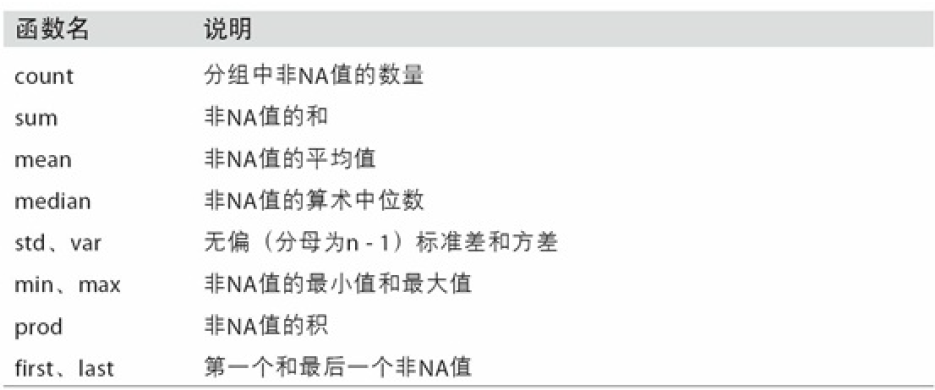

我们可以使用自己设计的聚合方法，而且可以调用分组后对象上的任意方法。例如，我们可以调用quantile来计算Series或DataFrame中列的样本的百分数。

尽管quantile并不是专门为GroupBy对象设计的方法，这是一个Series方法，但仍可以被GroupBy对象使用。**GroupBy会对Series进行切片（slice up），并对于切片后的每一部分调用piece.quantile(0.9)，然后把每部分的结果整合到一起**：

In [44]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'], 
                   'data1' : np.random.randn(5), 
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.362628,2.213941
1,a,two,0.944804,0.605136
2,b,one,-0.057636,1.014854
3,b,two,0.654181,0.508913
4,a,one,-0.869272,0.210473


In [45]:
grouped = df.groupby('key1')
for key, group in grouped:
    print(key)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.362628  2.213941
1    a  two  0.944804  0.605136
4    a  one -0.869272  0.210473
b
  key1 key2     data1     data2
2    b  one -0.057636  1.014854
3    b  two  0.654181  0.508913


In [46]:
grouped['data1'].quantile(0.9)

key1
a    0.683318
b    0.582999
Name: data1, dtype: float64

如果想用自己设计的聚合函数，把用于聚合数组的函数传入到aggregate或agg方法即可：

In [47]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [48]:
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,1.814077,2.003467
b,0.711817,0.505941


In [49]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0 -0.095699  0.936033 -0.869272 -0.615950 -0.362628  0.291088   
b      2.0  0.298272  0.503330 -0.057636  0.120318  0.298272  0.476226   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     0.944804   3.0  1.009850  1.061280  0.210473  0.407804  0.605136   
b     0.654181   2.0  0.761883  0.357755  0.508913  0.635398  0.761883   

                          
           75%       max  
key1                      
a     1.409538  2.213941  
b     0.888369  1.014854

## 逐列及多函数应用

In [50]:
tips = pd.read_csv('examples/tips.csv')

In [51]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [52]:
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [53]:
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


我们可以看到，对series或DataFrame进行聚合，其实就是通过aggregate使用合适的函数，或者调用一些像mean或std这样的方法。然而，我们可能想要在列上使用不同的函数进行聚合，又或者想要一次执行多个函数。幸运的是，这是可能的，下面将通过一些例子来说明。

In [54]:
grouped = tips.groupby(['day', 'smoker'])

In [55]:
grouped_pct = grouped['tip_pct']

In [56]:
for name, group in grouped_pct:
    print(name)
    print(group[:2], '\n')

('Fri', 'No')
91    0.155625
94    0.142857
Name: tip_pct, dtype: float64 

('Fri', 'Yes')
90    0.103555
92    0.173913
Name: tip_pct, dtype: float64 

('Sat', 'No')
19    0.162228
20    0.227679
Name: tip_pct, dtype: float64 

('Sat', 'Yes')
56    0.078927
58    0.156584
Name: tip_pct, dtype: float64 

('Sun', 'No')
0    0.059447
1    0.160542
Name: tip_pct, dtype: float64 

('Sun', 'Yes')
164    0.171331
172    0.710345
Name: tip_pct, dtype: float64 

('Thur', 'No')
77    0.147059
78    0.131810
Name: tip_pct, dtype: float64 

('Thur', 'Yes')
80    0.154321
83    0.152999
Name: tip_pct, dtype: float64 



In [57]:
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [58]:
# def peak_to_peak(arr):
#     return arr.max() - arr.min()
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

上面结果的列名是自动给出的，当然，我们也可以更改这些列名。这种情况下，传入一个由tuple组成的list，每个tuple的格式是`(name, function)`，每个元组的第一个元素会被用于作为DataFrame的列名（我们可以认为这个二元元组list是一个有序的映射）：

In [59]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

如果是处理一个DataFrame，我们有更多的选择，我们可以用一个含有多个函数的list应用到所有的列上，也可以在不同的列上应用不同的函数。演示一下，假设我们想要在tip_pct和total_bill这两列上，计算三个相同的统计指标：

In [60]:
functions = ['count', 'mean', 'max']

In [61]:
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [62]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

可以传递具有自定义名称的元组列表

In [63]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]

In [64]:
grouped['tip_pct', 'total_bill'].agg(ftuples)

tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

In [65]:
grouped.agg({'tip': np.max, 'size': 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [66]:
grouped.agg({'tip_pct': ['min', 'max', 'mean', 'std'],
             'size': 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

## 返回不含行索引的聚合数据

在前面所有的例子中，聚合数据返回时都是带有索引的，有时索引是分层的，由唯一的分组键联合形成。因为不是所有的情况下都需要索引，所以在大多数情况下可以通过向groupby传递as_index=False来禁用分组键作为索引的行为。

In [67]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


In [68]:
tips.groupby(['day', 'smoker']).mean()

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

# 应用：通用拆分-应用-联合

apply方法最常见的目的是apply（应用）

In [69]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [70]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [71]:
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [72]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

如果除了向apply传递函数，还传递其它参数或关键字的话，可以把这些放在函数后进行传递。

In [73]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [74]:
result = tips.groupby('smoker')['tip_pct'].describe()


In [75]:
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [76]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

## 压缩分组键

可以通过向groupby传递group_keys = False来禁用所得到的对象具有分组键所形成的分层索引以及每个原始对象的索引。

In [77]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


## 分位数与桶分析

In [78]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                       'data2': np.random.randn(1000)})
frame.head()

,data1,data2
0,-1.601409,0.198809
1,0.119633,-1.361112
2,-2.220661,2.122576
3,-0.082216,0.712224
4,1.210222,0.275867


In [79]:
quartiles = pd.cut(frame.data1, 4)
quartiles[:10]

0    (-2.895, -1.375]
1     (-1.375, 0.139]
2    (-2.895, -1.375]
3     (-1.375, 0.139]
4      (0.139, 1.653]
5      (0.139, 1.653]
6      (0.139, 1.653]
7      (0.139, 1.653]
8     (-1.375, 0.139]
9     (-1.375, 0.139]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.895, -1.375] < (-1.375, 0.139] < (0.139, 1.653] < (1.653, 3.168]]

cut返回的cateforical对象可以直接传递给groupby，所以可以计算出data2列的一个统计值集合

In [80]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [81]:
grouped = frame.data2.groupby(quartiles)

In [82]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-2.895, -1.375]",95.0,3.365258,0.084729,-2.254591
"(-1.375, 0.139]",488.0,2.869910,0.028731,-2.656752
"(0.139, 1.653]",366.0,2.720868,0.028133,-3.163798
"(1.653, 3.168]",51.0,2.933691,-0.064803,-2.501021


划分等长桶

In [83]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)

In [84]:
grouped = frame.data2.groupby(grouping)

In [85]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,3.365258,0.101378,-2.254591
1,100.0,2.868481,-0.032089,-2.140506
2,100.0,2.869910,0.111732,-2.054677
3,100.0,2.621896,-0.067650,-2.265472
4,100.0,2.610811,0.142844,-2.656752
5,100.0,2.416431,-0.057334,-2.241749
6,100.0,1.968048,-0.027965,-2.063048
7,100.0,2.720868,0.086556,-2.470901
8,100.0,2.136722,-0.085553,-3.163798


## 使用指定分组值填充缺失值

In [86]:
s = pd.Series(np.random.randn(6))

In [87]:
s[::2] = np.nan

In [88]:
s

0         NaN
1   -0.496381
2         NaN
3   -0.012777
4         NaN
5   -0.994409
dtype: float64

In [89]:
s.fillna(s.mean())

0   -0.501189
1   -0.496381
2   -0.501189
3   -0.012777
4   -0.501189
5   -0.994409
dtype: float64

In [90]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']

In [91]:
group_key = ['East'] * 4 + ['West'] * 4
group_key

['East', 'East', 'East', 'East', 'West', 'West', 'West', 'West']

In [92]:
data = pd.Series(np.random.randn(8), index=states)
data

Ohio          0.119190
New York     -0.087211
Vermont       1.132939
Florida      -2.476075
Oregon       -0.092827
Nevada       -2.370030
California   -0.020357
Idaho        -2.205615
dtype: float64

In [93]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio          0.119190
New York     -0.087211
Vermont            NaN
Florida      -2.476075
Oregon       -0.092827
Nevada             NaN
California   -0.020357
Idaho              NaN
dtype: float64

In [94]:
data.groupby(group_key).mean()

East   -0.814699
West   -0.056592
dtype: float64

使用分组的平均值来填充NA

In [95]:
fill_mean = lambda g: g.fillna(g.mean())

In [96]:
data.groupby(group_key).apply(fill_mean)

Ohio          0.119190
New York     -0.087211
Vermont      -0.814699
Florida      -2.476075
Oregon       -0.092827
Nevada       -0.056592
California   -0.020357
Idaho        -0.056592
dtype: float64

为每个分组预定义了填充值：

In [97]:
fill_values = {'East': 0.5, 'West': -1}

In [98]:
fill_func = lambda g: g.fillna(fill_values[g.name])

In [99]:
data.groupby(group_key).apply(fill_func)

Ohio          0.119190
New York     -0.087211
Vermont       0.500000
Florida      -2.476075
Oregon       -0.092827
Nevada       -1.000000
California   -0.020357
Idaho        -1.000000
dtype: float64

## 随机采样与排列

假设你想从大数据集中抽取随机样本（有或没有替换）以用于蒙特卡洛模拟目的或某些其它应用程序，有很多方法来执行“抽取”，这里我们使用Series的sample方法。

In [100]:
# Hearts红桃，Spades黑桃，Clubs梅花，Diamonds方片
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index=cards)

In [101]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [102]:
def draw(deck, n=5):
    return deck.sample(n)

In [103]:
draw(deck)

JD    10
JS    10
QD    10
8D     8
KC    10
dtype: int64

假设我们想要从每副花色中随机抽取两张，花色是每张牌名字的最后一个字符（即H, S, C, D），我们可以根据花色分组，然后使用apply：

In [104]:
get_suit = lambda card: card[-1] # last letter is suit

In [105]:
deck.groupby(get_suit).apply(draw, n=2)

C  3C      3
   4C      4
D  6D      6
   KD     10
H  JH     10
   2H      2
S  10S    10
   8S      8
dtype: int64

In [106]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

7C      7
10C    10
10D    10
7D      7
JH     10
QH     10
10S    10
AS      1
dtype: int64

## 示例：分组加权平均和相关性

In [107]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df

,category,data,weights
0,a,-0.331310,0.550622
1,a,-1.802547,0.486245
2,a,0.568119,0.696776
3,a,-0.163225,0.468724
4,b,0.482446,0.040762
5,b,0.043120,0.482225
6,b,0.355189,0.540762
7,b,0.003285,0.350964


通过category进行分组加权平均如下：

In [108]:
grouped = df.groupby('category')

In [109]:
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])

In [110]:
grouped.apply(get_wavg)

category
a   -0.335803
b    0.165182
dtype: float64

In [111]:
close_px = pd.read_csv('examples/stock_px_2.csv', parse_dates=True,
                       index_col=0)

In [112]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
AAPL    2214 non-null float64
MSFT    2214 non-null float64
XOM     2214 non-null float64
SPX     2214 non-null float64
dtypes: float64(4)
memory usage: 86.5 KB


In [113]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


一个比较有意思的尝试是计算一个DataFrame，包括与SPX这一列逐年日收益的相关性（计算百分比变化）。一个可能的方法是，我们先创建一个能计算不同列相关性的函数，然后拿每一列与SPX这一列求相关性：

In [114]:
spx_corr = lambda x: x.corrwith(x['SPX'])

然后我们通过pct_change在close_px上计算百分比的变化：

In [115]:
rets = close_px.pct_change().dropna()

In [116]:
rets.head()

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386


In [117]:
get_year = lambda x: x.year

In [118]:
by_year = rets.groupby(get_year)

In [119]:
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [120]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

## 逐组线性回归

就像上面介绍的例子，使用groupby可以用于更复杂的组对组统计分析，只要函数能返回一个pandas对象或标量。例如，我们可以定义regress函数（利用statsmodels库），在每一个数据块（each chunk of data）上进行普通最小平方回归（ordinary least squares (OLS) regression）计算：

In [121]:
import statsmodels.api as sm

In [122]:
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1
    result = sm.OLS(Y, X).fit()
    return result.params

In [123]:
by_year.apply(regress, 'AAPL', ['SPX'])  #这里有点没看懂

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


# 数据透视表与交叉表

Pivot Tables（数据透视表）是一种常见的数据汇总工具，常见与各种spreadsheet programs（电子表格程序，比如Excel）和一些数据分析软件。它能按一个或多个keys来把数据聚合为表格，能沿着行或列，根据组键来整理数据。

数据透视表可以用pandas的groupby来制作，这个本节会进行介绍，除此之外还会有介绍如何利用多层级索引来进行reshape（更改形状）操作。DataFrame有一个pivot_table方法，另外还有一个pandas.pivot_table函数。为了有一个更方便的groupby借口，pivot_table能添加partial totals（部分合计）,也被称作margins(边界)。

回到之前提到的tipping数据集，假设我们想要计算一个含有组平均值的表格(a table of group means，这个平均值也是pivot_table默认的聚合类型)，按day和smoker来分组

In [124]:
tips.pivot_table(index = ['day','smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

这个结果也可以通过groupby直接得到。

现在假设我们想要按time分组，然后对tip_pct和size进行聚合。我们会把smoker放在列上，而day用于行：

In [125]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

我们也快成把这个表格加强一下，通过设置margins=True来添加部分合计（partial total）。这么做的话有一个效果，会给行和列各添加All标签，这个All表示的是当前组对于整个数据的统计值：

In [127]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                  columns='smoker',margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

这里，对于All列，这一列的值是不考虑吸烟者和非吸烟者的平均值（smoker versus nonsmoker）。对于All行，这一行的值是不考虑任何组中任意两个组的平均值（any of the two levels of grouping）。

想要使用不同的聚合函数，传递给aggfunc即可。例如，count或len可以给我们一个关于组大小（group size）的交叉表格：

In [128]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

如果一些组合是空的（或NA），我们希望直接用fill_value来填充：

In [129]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                 columns='day', aggfunc='mean', fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

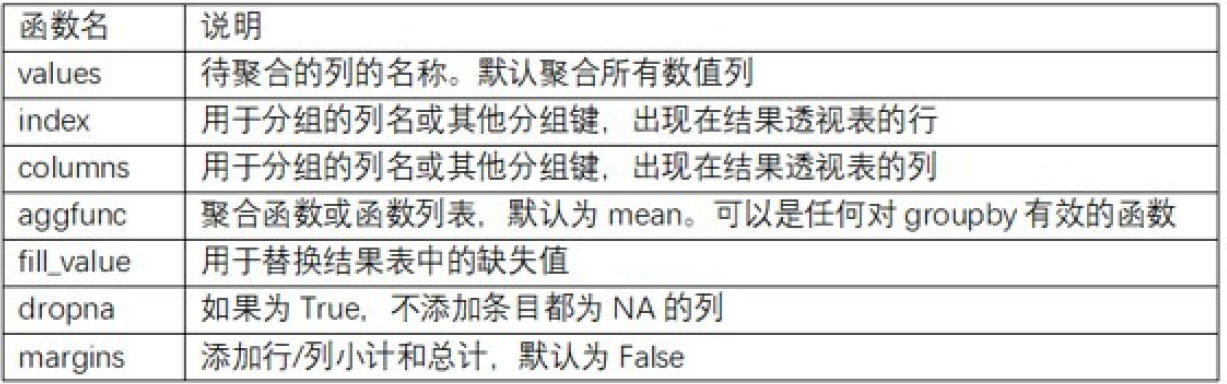

## 交叉表：crosstab

In [130]:
data = pd.DataFrame({'Sample': np.arange(1, 11),
        'Nationality': ['USA', 'Japan', 'USA', 'Japan', 'Japan', 'Japan', 'USA', 'USA', 'Japan', 'USA'],
        'Handedness': ['Right-handed', 'Left-handed', 'Right-handed', 'Right-handed', 'Left-handed', 'Right-handed', 'Right-handed', 'Left-handed', 'Right-handed', 'Right-handed']})
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


作为调查分析（survey analysis）的一部分，我们想要按国家和惯用手来进行汇总。我们可以使用pivot_table来做到这点，不过pandas.crosstab函数会更方便一些：

In [131]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


crosstab的前两个参数可是数组、Series或数组的列表。在消费数据中可以这样做：

In [132]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244